<a href="https://colab.research.google.com/github/hydu0016/Pytorch_Udemy/blob/main/03_pytorch_computer_vision_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.0.1+cu118
torchvision version: 0.15.2+cu118


#Torchvision Datasets
###train_data的组成图解：
【1】【2】【3】。。。。【6000】  
其中： train_data中包含6000个元素，每个元素中：【1】= features, label = (x1,x2,x3....xn),(y)

###Train_data的用法01：
image,label=train_data[0]  
这样可以拿到指定元素的X和y

In [ ]:
train_data= datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data= datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 20178133.60it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 304530.96it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5596680.58it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4491840.44it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
image,label=train_data[0]
len(train_data.data),len(train_data.targets)

(60000, 60000)

In [ ]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, '9')

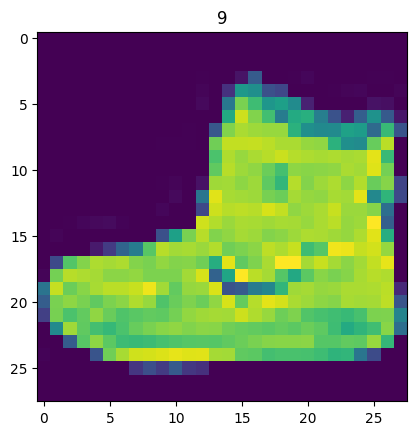

In [ ]:
import matplotlib.pyplot as plt

image,label=train_data[0]
plt.imshow(image.squeeze())
plt.title(label)

#Dataloader
dataloader作用是把数据集分成一个一个的batch  
##图解
train_data:[1] [2] [3] [4] [5] [6]  
经过dataloader处理后  
train_dataloader: 【[1][2][3]】【[4][5][6]】

##用法01：
for X,y in train_dataloader  
这样就能遍历拿到每个batch。

##Metaphor
之前简单的神经网络训练，直接把全部数据集喂给模型。  
这次就是把一个大数据集，分成n个小batch，一次喂一个batch。

#Dataset和Dataloader的区别
torch.utils.data.Dataset object is indexable (dataset[5] works fine for example). It is a simple object which defines how to get a single (usually single) sample of data.  

torch.utils.data.DataLoader - non-indexable, only iterable, usually returns batches of data from above Dataset. Can work in parallel using num_workers. It's what you are trying to index while you should use dataset for that.


In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader=DataLoader(train_data,batch_size=BATCH_SIZE, shuffle=True)

test_dataloader=DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)

len(train_dataloader)

train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape
len(train_dataloader)

1875

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


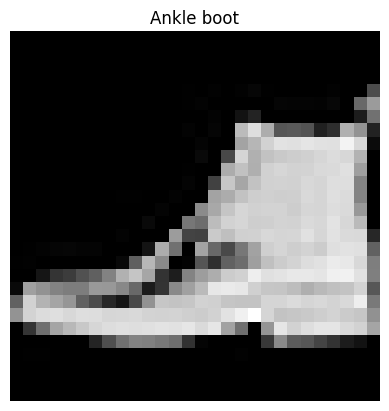

In [ ]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [ ]:
flatten_model=nn.Flatten()

x=train_features_batch[0]

output=flatten_model(x)

output.shape

torch.Size([1, 784])

In [ ]:
from torch.nn.modules.linear import Linear
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int,hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)

model_0=FashionMNISTModelV0(input_shape=784,hidden_units=10,output_shape=len(class_names))

model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
from tqdm.auto import tqdm


torch.manual_seed(42)
train_time_start_on_cpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n--------")
  train_loss = 0
  ###Training
  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred=model_0(X)

    loss=loss_fn(y_pred,y)
    train_loss += loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader)

  ###Testing
  test_loss, test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred=model_0(X)
      test_loss+=loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))



    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.47426, Test acc: 83.31%

Epoch:1
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.43953, Test acc: 84.63%

Epoch:2
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.43026, Test acc: 84.94%

Train time on cpu: 48.200 seconds


#Make predictions and get Model 0 results

#Note
## Why use loss.item() in number 21 line below
In PyTorch, tensors can have multiple dimensions, and even a scalar value in PyTorch is represented as a tensor with zero dimensions. The .item() method is used to retrieve the scalar value from a one-element tensor.

In the given code snippet, after accumulating the loss values for all batches and dividing by the number of batches, the loss variable is still a tensor. If you try to print it directly or save it to some data structures (like dictionaries, lists, etc.), it would still carry the tensor structure, even if it's just a single scalar value.

Using .item() converts the tensor to a standard Python scalar value (like a float), which is often more convenient for further processing or storage.

If you don't use .item(), and the tensor has more than one element, you'll get a runtime error. But in this context, since the loss is a scalar after averaging over batches, .item() works correctly and extracts the scalar value.

Note: It's important to ensure that the tensor has only one element when calling .item(). If it has more than one element, it will raise a ValueError.

In [ ]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn
               ):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():

    for X,y in data_loader:
      y_pred=model(X)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)

  return{"model_name": model.__class__.__name__,
      "model_loss":loss.item(),
      "model_acc":acc}


model_0_results=eval_model(model_0, test_dataloader, loss_fn, accuracy_fn=accuracy_fn)
model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4302613139152527,
 'model_acc': 84.94166666666666}

#Setup device agnostic-code(for using a GPU if there is one)

In [ ]:
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#Build a better model with non-linearity


In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784,hidden_units=10,output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  train_loss,train_acc=0,0
  model.to(device)
  for batch,(X,y) in enumerate(data_loader):
    X,y=X.to(device),y.to(device)
    y_pred=model(X)

    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)


def test_step(data_loader:torch.utils.data.DataLoader,
              model:torch.nn.Module,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  test_loss,test_acc=0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)
      test_pred=model(X)
      loss=loss_fn(test_pred,y)
      test_loss+=loss
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test_loss:{test_loss:.5f}|Test accuracy:{test_acc:.2f}%\n")


In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_on_gpu=timer()

epoches=3

for epoch in tqdm(range(epoches)):
  print(f"Epoch:{epoch}\n---------")
  train_step(data_loader=train_dataloader,
             model=model_1,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(data_loader=test_dataloader,
            model=model_1,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            )

train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,end=train_time_end_on_gpu,device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
---------
Test_loss:0.92727|Test accuracy:66.00%

Epoch:1
---------
Test_loss:0.68752|Test accuracy:75.19%

Epoch:2
---------
Test_loss:0.64302|Test accuracy:76.43%

Train time on cuda: 55.025 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
  loss, acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)
      y_pred=model(X)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

model_1_results=eval_model(model=model_1,data_loader=test_dataloader,
                           loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

model_1_results


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.643019437789917,
 'model_acc': 76.42833333333333}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4302613139152527,
 'model_acc': 84.94166666666666}

#Building a Convolutional Neural Network(CNN)
https://poloclub.github.io/cnn-explainer/ CNN工作原理图解网站  
https://www.youtube.com/watch?v=KuXjwB4LzSA&t=829s 卷积原理解释
##nn.Conv2d的parameters详解：  

1.in_channels:这个主要看输入图像有几个通道，一般是三通道：红黄蓝  

2.out_channels:决定输出多少张特征图，每张特征图是三个通道的特征提取图相加出的一个总体特征

3.Kernel_size,stride,padding这三个参数详见网站解释。  

4.注意：参数中没有像素数量的变量  



In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

###nn.Conv2d()详解：  
注意一点我们输入的图片第一位必须带有batchsize,不带的话不会报错但是其实是错误的。

In [ ]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [ ]:
torch.manual_seed(42)

conv_layer=nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)

conv_layer(test_image.unsqueeze(dim=0))#convolutional layer can only take tensor with 4 dimonsion (batchsize, RGB, height, width)

test_image.shape

torch.Size([3, 64, 64])

##nn.MaxPool2d()详解

Notice the change in the shapes of what's happening in and out of a nn.MaxPool2d() layer.

The kernel_size of the nn.MaxPool2d() layer will effects the size of the output shape.

In our case, the shape halves from a 62x62 image to 31x31 image.

Let's see this work with a smaller tensor.

In [ ]:
torch.manual_seed(42)

# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


#Setup a loss function and optimizer for model_2

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2=timer()
epoches=3

for epoch in tqdm(range(epoches)):
  print(f"Epoch: {epoch}\n---------")
  train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
  test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Test_loss:0.38472|Test accuracy:86.11%

Epoch: 1
---------
Test_loss:0.31606|Test accuracy:88.58%

Epoch: 2
---------
Test_loss:0.28157|Test accuracy:89.90%

Train time on cuda: 67.306 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2815726697444916,
 'model_acc': 89.90333333333334}

Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.430261,84.941667
1,FashionMNISTModelV1,0.643019,76.428333
2,FashionMNISTModelV2,0.281573,89.903333


In [ ]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.430261,84.941667,48.199962
1,FashionMNISTModelV1,0.643019,76.428333,55.025286
2,FashionMNISTModelV2,0.281573,89.903333,67.305740
